In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#lasso regression
from sklearn import linear_model

#Ridge
from sklearn.linear_model import Ridge

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [6]:
df = pd.read_csv("data/b_housing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000
mean,3.599645,11.368110,11.123917,0.068898,0.554574,6.283561,88.055315,3.801993,9.531496,407.854331,18.442717,356.827283,12.652185,22.534252
std,8.587406,23.276516,6.849870,0.253530,0.115665,0.701438,441.531284,2.104464,8.694746,168.314766,2.170287,91.147283,7.126976,9.178975
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082155,0.000000,5.190000,0.000000,0.449000,5.886500,45.075000,2.100525,4.000000,279.000000,17.225000,375.472500,6.990000,17.075000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.205000,77.150000,3.215700,5.000000,330.000000,19.000000,391.475000,11.395000,21.200000
75%,3.674807,12.500000,18.100000,0.000000,0.624000,6.620500,94.025000,5.214600,24.000000,666.000000,20.200000,396.215000,16.945000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,10000.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.corr()['medv'].sort_values()

lstat     -0.737664
ptratio   -0.505771
indus     -0.483582
tax       -0.468318
nox       -0.427302
crim      -0.388239
rad       -0.381502
age       -0.053058
chas       0.175191
dis        0.249714
black      0.333407
zn         0.360450
rm         0.695090
medv       1.000000
Name: medv, dtype: float64

#looks like lstat has a strong negative correlation with medv

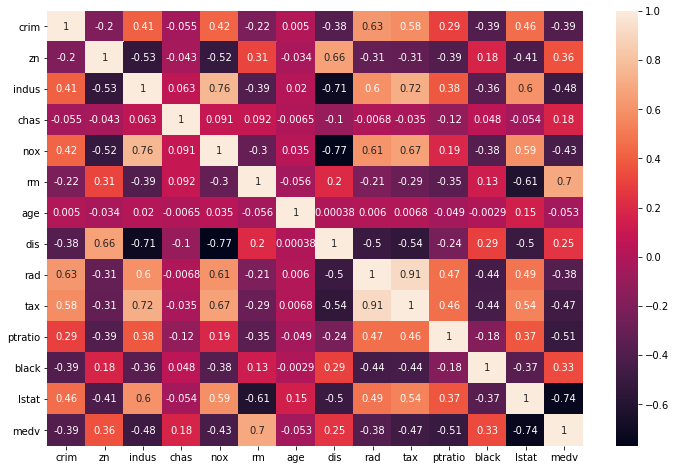

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

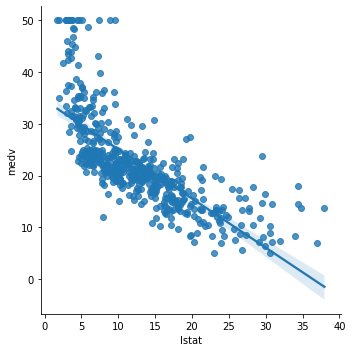

In [10]:
sns.lmplot('lstat', 'medv', df)

In [11]:
#linear regression lstat
X = df['lstat']
y = df['medv']
model1 = lm.LinearRegression()

model1.fit(X[:,np.newaxis], y)    
model1_y = model1.predict(X[:,np.newaxis])
print('Coefficients: ', model1.coef_)
print("y-intercept ", model1.intercept_)

Coefficients:  [-0.95005203]
y-intercept  34.55448608775667


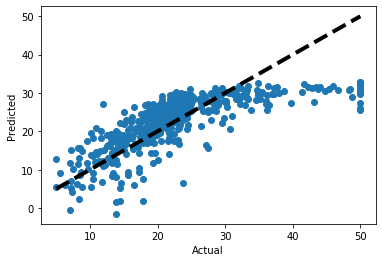

In [12]:
plt.subplots()
plt.scatter(y, model1_y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [13]:
#linear regression rm
X = df['rm']
y = df['medv'] 
model2 = lm.LinearRegression()
model2.fit(X[:,np.newaxis], y)
model2_y = model2.predict(X[:,np.newaxis])
print('Coefficients: ', model2.coef_)
print("y-intercept ", model2.intercept_)

Coefficients:  [9.09590652]
y-intercept  -34.6204317421665


In [14]:
print("mean square error: ", mean_squared_error(y, model1_y))
print(explained_variance_score(y, model1_y))

mean square error:  38.33155403042411
0.5441480396158109


In [15]:
print("mean square error: ", mean_squared_error(y, model2_y))
print(explained_variance_score(y, model2_y))

mean square error:  43.460701489475504
0.4831504624642986


In [16]:
runs_reg_model1 = ols("medv~lstat", df)
runs_reg1 = runs_reg_model1.fit()
print(runs_reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     604.0
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           2.31e-88
Time:                        17:51:24   Log-Likelihood:                -1647.0
No. Observations:                 508   AIC:                             3298.
Df Residuals:                     506   BIC:                             3306.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5545      0.561     61.571      0.0

In [17]:
runs_reg_model2 = ols("medv~rm", df)
runs_reg2 = runs_reg_model2.fit()
print(runs_reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     473.0
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           1.54e-74
Time:                        17:51:24   Log-Likelihood:                -1678.9
No. Observations:                 508   AIC:                             3362.
Df Residuals:                     506   BIC:                             3370.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6204      2.644    -13.093      0.0

In [18]:
y = df[['medv']] 
X = df[['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat']]

In [19]:
model1 = linear_model.Lasso(alpha=.1)            
model1.fit(X, y)
model1_y = model1.predict(X)

In [20]:
print('Coefficients: ', model1.coef_)
print("y-intercept ", model1.intercept_)

Coefficients:  [-9.64240616e-02  5.17031026e-02 -3.94850484e-02  9.14194528e-01
 -0.00000000e+00  3.61922602e+00  5.64796768e-04 -1.11792690e+00
  2.75473235e-01 -1.47005342e-02 -7.53620924e-01  1.00381945e-02
 -5.94069732e-01]
y-intercept  [25.33201008]


In [21]:
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('crim', '-0.096'),
 ('zn', '0.052'),
 ('indus', '-0.039'),
 ('chas', '0.914'),
 ('nox', '-0.000'),
 ('rm', '3.619'),
 ('age', '0.001'),
 ('dis', '-1.118'),
 ('rad', '0.275'),
 ('tax', '-0.015'),
 ('ptratio', '-0.754'),
 ('black', '0.010'),
 ('lstat', '-0.594')]

In [22]:
model2 = Ridge(alpha=1.0)
model2.fit(X, y)
model2_y = model2.predict(X)

In [23]:
print('Coefficients: ', model2.coef_)
print("y-intercept ", model2.intercept_)

Coefficients:  [[-1.03463283e-01  4.90938945e-02 -9.05771174e-03  2.53826590e+00
  -1.10028634e+01  3.79907290e+00  5.39544027e-04 -1.36044555e+00
   2.90576370e-01 -1.29500834e-02 -8.63736493e-01  9.50539619e-03
  -5.50650503e-01]]
y-intercept  [31.64646274]


In [24]:
print("mean square error: ", mean_squared_error(y, model1_y))
print("variance or r-squared: ", explained_variance_score(y, model1_y))

mean square error:  22.958861233551197
variance or r-squared:  0.7269653640132607


In [25]:
print("mean square error: ", mean_squared_error(y, model2_y))
print("variance or r-squared: ", explained_variance_score(y, model2_y))
#Ridge model was more accurate

mean square error:  21.902811452804954
variance or r-squared:  0.7395242694631774


In [26]:
X_new = SelectKBest(f_regression, k=2).fit_transform(X, y)
X_new

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 6.575,  4.98 ],
       [ 6.421,  9.14 ],
       [ 7.185,  4.03 ],
       ...,
       [ 6.03 ,  7.88 ],
       [ 6.012, 12.43 ],
       [ 6.012, 12.43 ]])

In [27]:
selector = SelectKBest(f_regression, k=2).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[ 5 12]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
X.columns[12]

'lstat'

In [29]:
X_n = SelectKBest(f_regression, k=3).fit_transform(X, y)

model3 = lm.LinearRegression()
model3.fit(X_n, y)
model3_y = model3.predict(X_n)

print("mean square error: ", mean_squared_error(y, model3_y))
print("variance or r-squared: ", explained_variance_score(y, model3_y))



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean square error:  27.033007690927718
variance or r-squared:  0.6785142198719796


Best model is ridge regression model with mean square error:  21.902811452804954
variance or r-squared:  0.7395242694631774

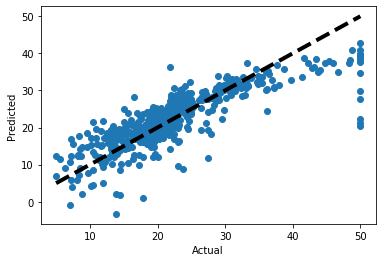

In [30]:
plt.subplots()
plt.scatter(y, model3_y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
#ridge

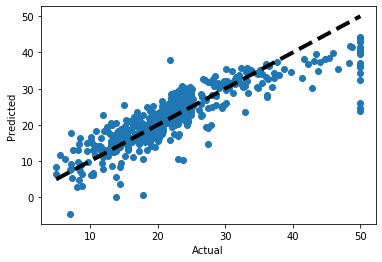

In [31]:
#lasso
plt.subplots()
plt.scatter(y, model2_y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(n_estimators=100, random_state=0)
regr.fit(X, y)
regr_predicted = regr.predict(X)

print("mean square error: ", mean_squared_error(y, regr_predicted))
print("variance or r-squared: ", explained_variance_score(y, regr_predicted))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


mean square error:  1.5491060177165334
variance or r-squared:  0.9815786655691602


In [33]:
sorted(zip(regr.feature_importances_, X.columns))

[(0.0008621675853693225, 'zn'),
 (0.0010777958185222794, 'chas'),
 (0.003596363638407636, 'rad'),
 (0.005628049084479768, 'indus'),
 (0.011168248289532737, 'black'),
 (0.012047944887306372, 'age'),
 (0.015455826148179301, 'tax'),
 (0.016826518627649625, 'ptratio'),
 (0.02118258662163302, 'nox'),
 (0.040525651233559536, 'crim'),
 (0.06448906999454111, 'dis'),
 (0.3538677144984843, 'lstat'),
 (0.453272063572335, 'rm')]

In [34]:
feature_importances = pd.DataFrame(regr.feature_importances_, index = X.columns, columns=['importance']).sort_values('importance', ascending=False)

feature_importances

,importance
rm,0.453272
lstat,0.353868
dis,0.064489
crim,0.040526
nox,0.021183
ptratio,0.016827
tax,0.015456
age,0.012048
black,0.011168
indus,0.005628


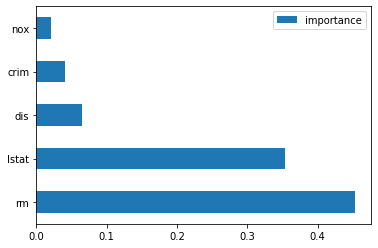

In [35]:
feature_importances.head().plot(kind='barh')

rm is the most important variable in predicting the medv

In [36]:
#Model deployment
scoring = pd.read_csv("data/b_housing_scoringdataset.csv")
scoring.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [45]:
columns = scoring[['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat']]
regr.predict(columns)

array([25.334, 22.041, 34.926, 33.84 , 35.495, 27.026, 22.833, 23.171,
       16.786, 18.974, 17.686, 19.733, 21.487, 20.296, 18.633, 20.128,
       22.373, 17.846, 19.411, 18.706, 13.978, 19.128, 15.53 , 14.622,
       15.926, 14.52 , 16.708, 14.828, 18.9  , 22.019, 13.483, 16.729,
       14.286, 13.633, 13.685, 19.827, 20.194, 20.877, 23.115, 29.683,
       34.362, 27.931, 24.941, 24.578, 21.639, 19.256, 19.919, 18.186,
       16.004, 19.495])

In [38]:
columns = scoring[['lstat','rm','dis']]
model3.predict(columns)

array([[ 32.51541416],
       [ 50.97771923],
       [ 27.15119658],
       [ 21.76647576],
       [ 32.4418134 ],
       [ 32.56242388],
       [ 65.90204443],
       [ 95.93467555],
       [145.13270958],
       [ 86.44831241],
       [101.40007104],
       [ 69.32432614],
       [ 80.91845567],
       [ 47.58153292],
       [ 56.63466367],
       [ 48.75753085],
       [ 40.11301682],
       [ 76.80185404],
       [ 64.07727992],
       [ 61.97149942],
       [106.18328421],
       [ 73.16496885],
       [ 95.14554428],
       [100.63062323],
       [ 84.15661408],
       [ 85.37604416],
       [ 77.35654912],
       [ 88.44589657],
       [ 67.76141521],
       [ 64.00913136],
       [112.95063343],
       [ 69.39866297],
       [135.98975661],
       [ 93.98812302],
       [102.64172796],
       [ 54.79131656],
       [ 62.69353931],
       [ 50.42277878],
       [ 56.51825489],
       [ 28.76108784],
       [ 17.77706923],
       [ 30.76893186],
       [ 35.71374769],
       [ 43

In [43]:
columns = scoring[['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat']]
model2.predict(columns)

array([[30.31153098],
       [24.91067333],
       [30.57870031],
       [28.9245268 ],
       [28.19684835],
       [25.51904985],
       [22.93777964],
       [19.33713888],
       [11.06437722],
       [18.84986568],
       [18.81017758],
       [21.57563969],
       [20.7495279 ],
       [20.09024859],
       [19.73248489],
       [19.8071344 ],
       [21.08940106],
       [17.22627546],
       [16.51072254],
       [18.76091656],
       [12.6235443 ],
       [17.97993931],
       [16.01138094],
       [13.96908532],
       [15.96745399],
       [13.66428579],
       [15.82222324],
       [14.96178858],
       [19.92611149],
       [21.250269  ],
       [11.55932439],
       [18.40374241],
       [ 8.7307283 ],
       [14.44550139],
       [13.79096905],
       [23.79906472],
       [22.28203531],
       [23.18801579],
       [22.949146  ],
       [31.49218569],
       [34.40656118],
       [27.97152378],
       [25.13530059],
       [24.50081437],
       [22.77314983],
       [21